# Dependencies

In [43]:
pacman::p_load(ggplot2, fitdistrplus, distr)

# Functions

In [26]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")

# Paths

In [1]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"

gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [2]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

In [3]:
load(file = paste0(datapath,"capTCRseq/meta_div_TRB.RData"))

Warning message in load(file = paste0(datapath, "capTCRseq/meta_div_TRB.RData")):
"strings not representable in native encoding will be translated to UTF-8"


find an appropriate distribution to draw random samples from

In [28]:
pbmc <- meta_div[ which(meta_div$sampletype == "PBMC"),]

In [29]:
dim(pbmc)

[1] 281  58

In [30]:
x <- pbmc$TRB[!is.na(pbmc$TRB)]

summary statistics
------
min:  1   max:  2237 
median:  130 
mean:  241.3345 
estimated sd:  298.8395 
estimated skewness:  2.689909 
estimated kurtosis:  13.49873 

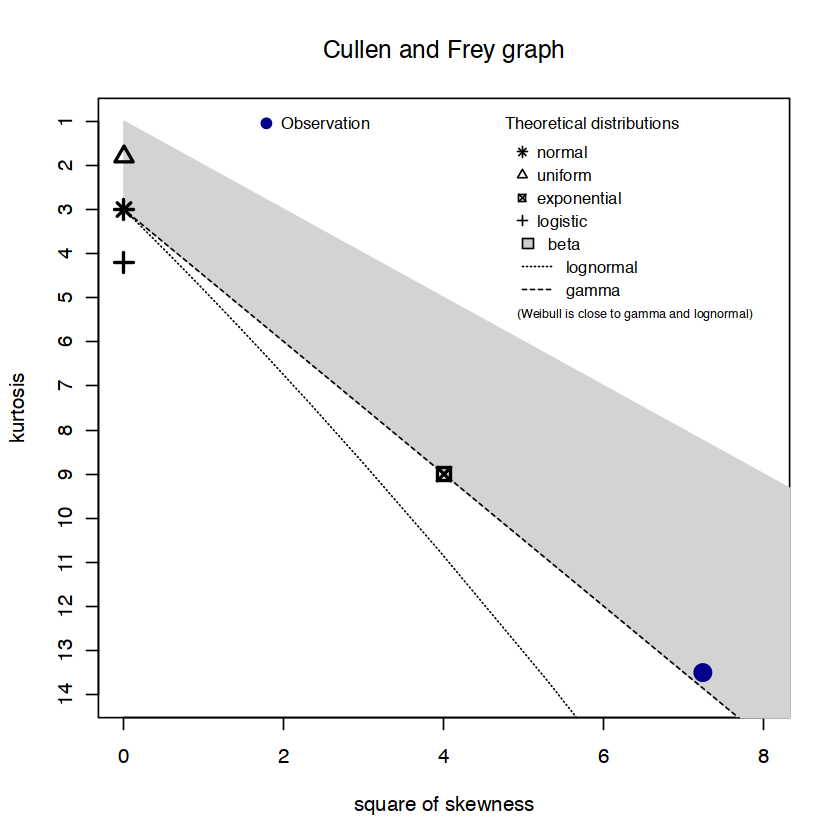

In [31]:
descdist(x, discrete = FALSE)

In [32]:
fit.weibull <- fitdist(x, "weibull")
fit.lnorm <- fitdist(x, "lnorm")
fit.gamma <- fitdist(x, "gamma")

In [33]:
fit.weibull

Fitting of the distribution ' weibull ' by maximum likelihood 
Parameters:
         estimate Std. Error
shape   0.8374402  0.0385476
scale 218.9817083 16.4583006

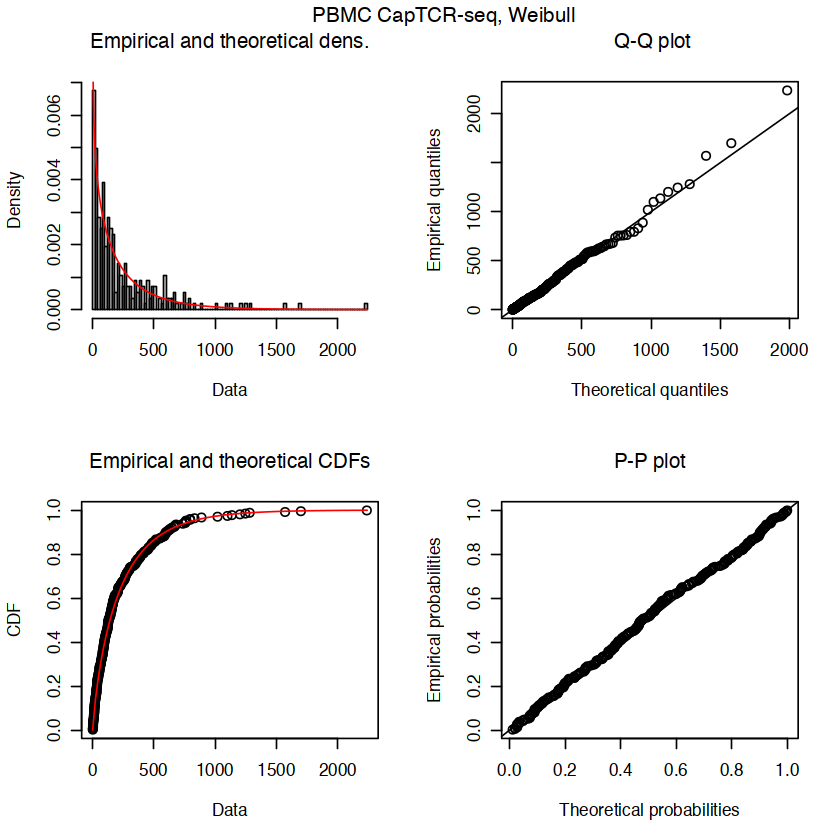

In [54]:
plot(fit.weibull, breaks = 100)
mtext("PBMC CapTCR-seq, Weibull", side = 3, line = 3)

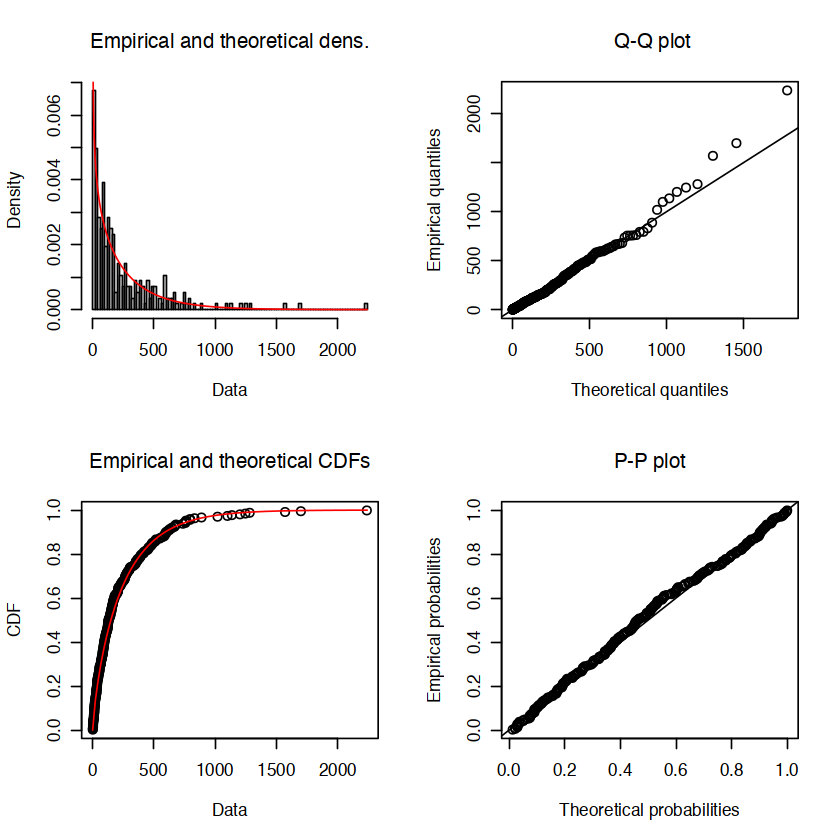

In [35]:
plot(fit.gamma, breaks = 100)

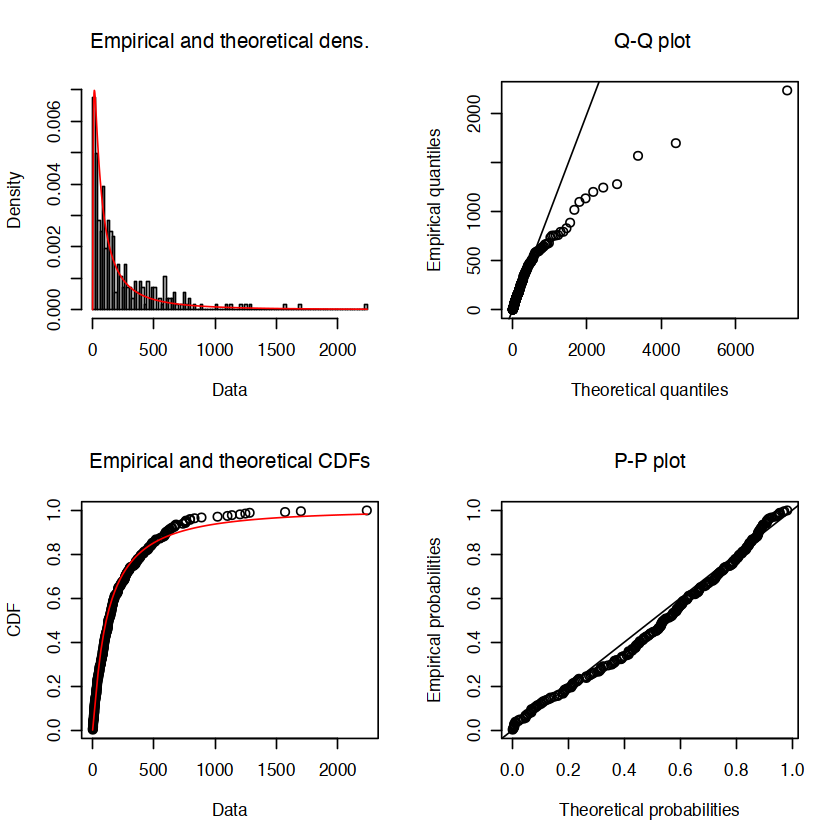

In [36]:
plot(fit.lnorm, breaks = 100)

In [37]:
summary(pbmc$TRB)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    48.0   130.0   241.3   338.0  2237.0 

In [38]:
dim(pbmc)

[1] 281  58

CapTCR-seq histogram

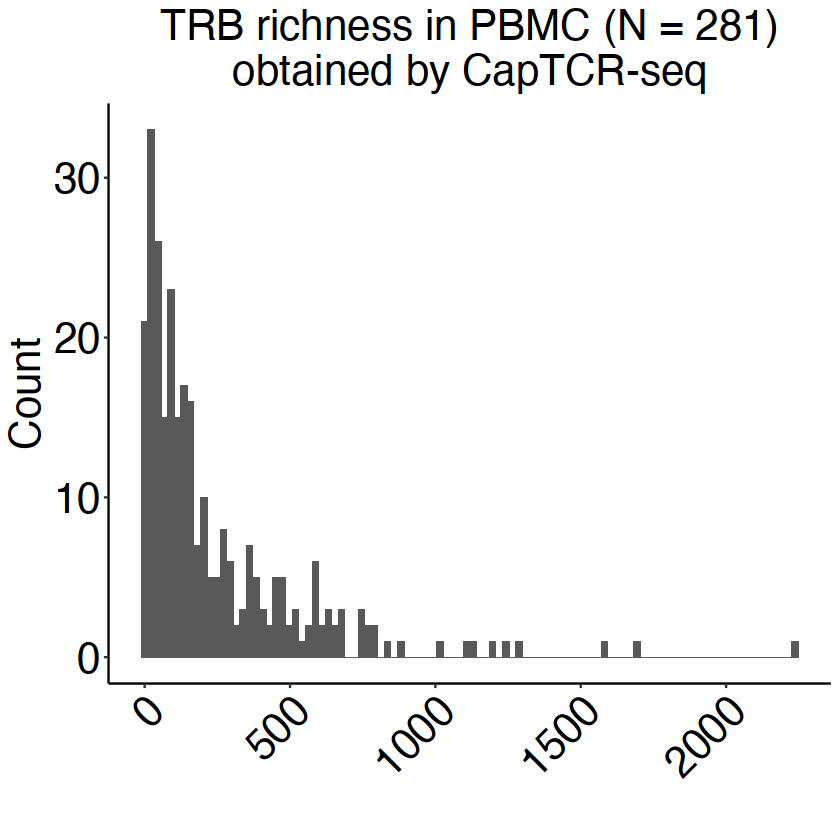

In [44]:
ggplot(pbmc, aes(x = TRB)) + geom_histogram(bins = 100) + myaxis + myplot +
labs(x = "", y = "Count", title = "TRB richness in PBMC (N = 281)\nobtained by CapTCR-seq") #regardless of cycle or cancer type

What about adaptive histogram?

In [69]:
load(file = paste0(datapath, "Adaptivedatasets/Adaptive_clones_testname.RData"))

In [62]:
dim(Adaptive_clones_testname)

[1] 1226    5

In [63]:
Adaptive_clones_testname[ is.na(Adaptive_clones_testname$productive_rearrangements),]

sample_name,total_rearrangements,productive_rearrangements,sample_amount_ng,test_name
<chr>,<int>,<int>,<chr>,<chr>


In [71]:
Adaptive_clones_testname$sample_amount_ng[ Adaptive_clones_testname$sample_amount_ng == "no data"] <- NA

In [72]:
Adaptive_clones_testname$sample_amount_ng <- as.numeric(Adaptive_clones_testname$sample_amount_ng)

In [73]:
summary(Adaptive_clones_testname$sample_amount_ng)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
     16    1385    2896    2859    3636    8853     293 

Warning message:
"Removed 293 rows containing non-finite values (`stat_bin()`)."


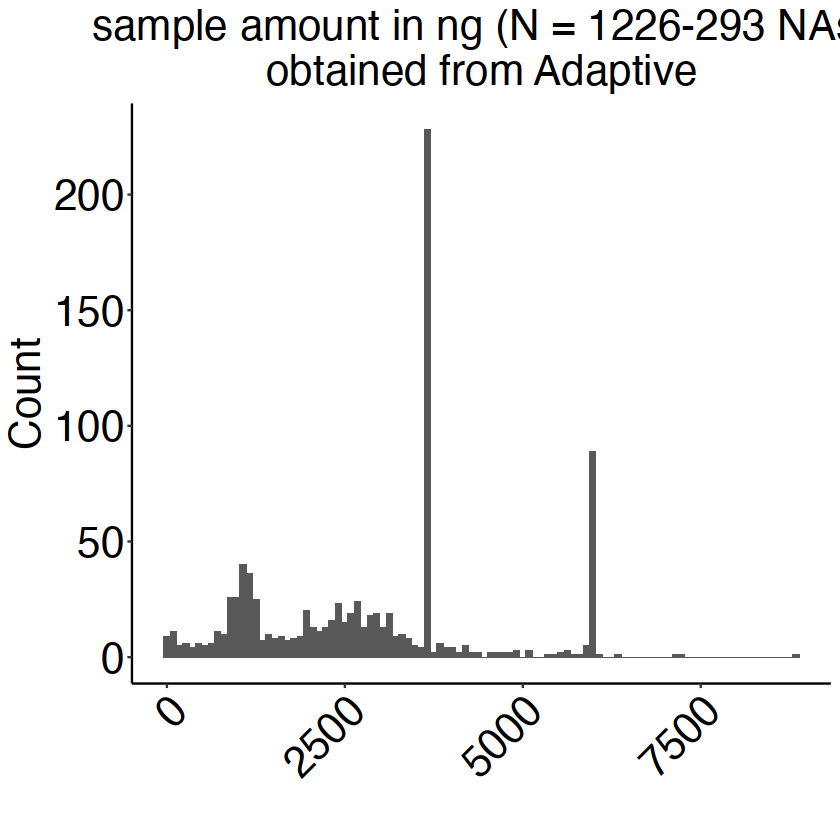

In [93]:
ggplot(Adaptive_clones_testname, aes(x = sample_amount_ng)) + geom_histogram(bins = 100) + myaxis + myplot +
labs(x = "", y = "Count", title = "sample amount in ng (N = 1226-293 NAs)\nobtained from Adaptive")  # All adaptive 


In [92]:
summary(Adaptive_clones_testname$productive_rearrangements)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      5  106104  164568  173162  230476  591798 

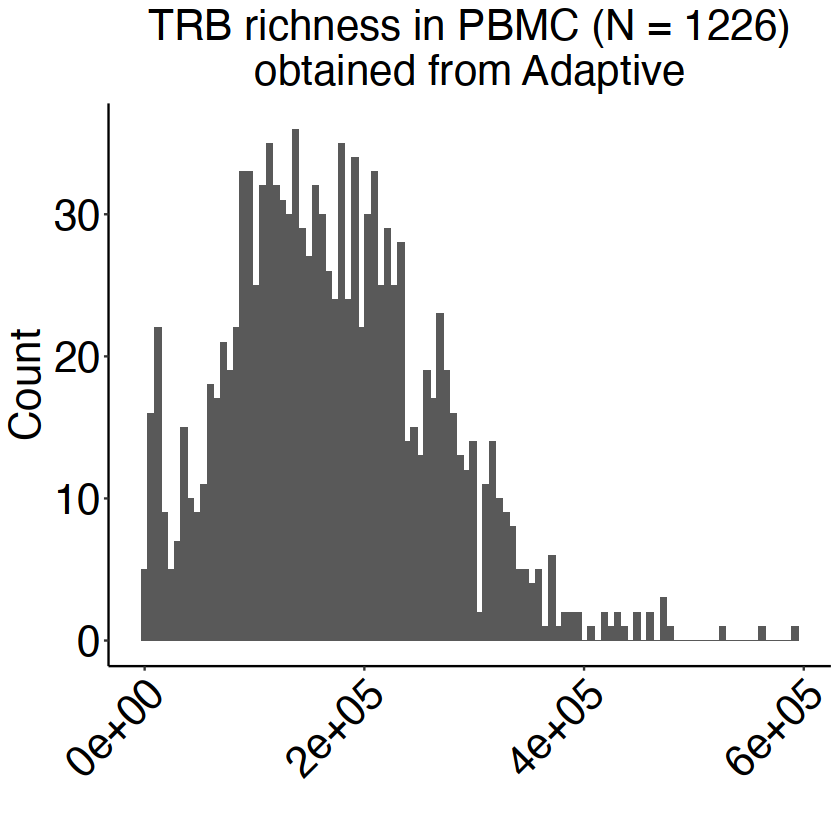

In [91]:
ggplot(Adaptive_clones_testname, aes(x = productive_rearrangements)) + geom_histogram(bins = 100) + myaxis + myplot +
labs(x = "", y = "Count", title = "TRB richness in PBMC (N = 1226)\nobtained from Adaptive")  # All adaptive 


In [18]:
# load discovery and validation metadata
load(file = paste0(datapath,"discovery_metadata.RData"))
load(file = paste0(datapath,"validation_metadata.RData"))

CHP data in disc set

In [19]:
# from GLIPH_input.ipynb
load(file = paste0(datapath,"capTCRseq/INT_gliph_input.RData"))

In [20]:
taball_pbmc <- taball[ grepl("PBMC", taball$subject),]

In [21]:
taball_discovery <- taball_pbmc[taball_pbmc$subject %in% discovery_metadata$sample_name,]

In [22]:
head(discovery_metadata)

,Patient,Age,sampletype,study,Agegroup,Sex,disease,sample_name
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Preterm_23_3,0,PBMC,Carey,Neonate,Male,Ctrl,Preterm_23_3
2,Preterm_25_5,0,PBMC,Carey,Neonate,Female,Ctrl,Preterm_25_5
3,Preterm_26_B_2,0,PBMC,Carey,Neonate,Male,Ctrl,Preterm_26_B_2
4,Preterm_27_4,0,PBMC,Carey,Neonate,Female,Ctrl,Preterm_27_4
5,Adult_1_15-04,39,PBMC,Carey,Adult,NA,Ctrl,Adult_1_15-04
6,Adult_2_15-07,39,PBMC,Carey,Adult,NA,Ctrl,Adult_2_15-07


In [23]:
length(unique(discovery_metadata$Patient[ discovery_metadata$study == "INTERCEPT"]))

[1] 57

In [24]:
length(unique(taball_discovery$`subject:condition`))

[1] 57

In [25]:
save(taball_discovery, file = paste0(h4hpath,"analysis/GLIPH/GLIPH_input/INT_gliph_input_discovery.RData"))

Adaptive data

In [26]:
# use cleaned up Adaptive data geenrated in GLIPH_input.ipynb
myfilelist <- list.files("/Users/anabbi/Desktop/H4H/projects/INTERCEPT/Adaptive/tsv_cleanup/", 
                        pattern = ".txt", full.names = T, recursive = T)

In [27]:
myfilelist <- myfilelist[!grepl("files", myfilelist)]

In [28]:
myfilelist_df <- data.frame(file = myfilelist, stringsAsFactors = F)

In [29]:
myfilelist_df$sample <- gsub(".txt", "", basename(myfilelist_df$file))

In [30]:
dim(discovery_metadata)

[1] 1098    8

In [31]:
table(discovery_metadata$study)


    Carey   Emerson Henderson INTERCEPT  Mitchell 
       14       666        62       140       216 

In [32]:
myfilelist_discovery <- myfilelist_df$file[ myfilelist_df$sample %in% discovery_metadata$sample_name]

In [33]:
myfilelist_discovery <- gsub("/Users/anabbi/Desktop/H4H/projects/INTERCEPT/",
"/cluster/projects/pughlab/projects/INTERCEPT/", myfilelist_discovery)

In [34]:
head(myfilelist_discovery)

[1] "/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/tsv_cleanup//Carey_Preterm2017/Adult_1_15-04.txt" 
[2] "/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/tsv_cleanup//Carey_Preterm2017/Adult_2_15-07.txt" 
[3] "/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/tsv_cleanup//Carey_Preterm2017/Adult_3_15-03.txt" 
[4] "/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/tsv_cleanup//Carey_Preterm2017/Adult_4_15-05.txt" 
[5] "/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/tsv_cleanup//Carey_Preterm2017/Adult_5_15-06.txt" 
[6] "/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/tsv_cleanup//Carey_Preterm2017/Infant_1_NWK51.txt"

In [35]:
#remove files with < 200 clones
myfilelist_discovery <- myfilelist_discovery[!grepl("310264_TCRB", myfilelist_discovery)] # 5 clones
myfilelist_discovery <- myfilelist_discovery[!grepl("Daisy-6_TCRB", myfilelist_discovery)] # 75 clones

In [36]:
myfilelist <- myfilelist_discovery
save(myfilelist, file = paste0(h4hpath,"analysis/GLIPH/GLIPH_input/myfilelist_discovery.RData"))

In [29]:
#on h4h #sampleadaptive.fx 

In [38]:
dim(discovery_metadata[discovery_metadata$study != "INTERCEPT",])

[1] 958   8

In [42]:
# we need 958 - 2 = 956 random values from Weibull distribution with shape = 0.8 and scale = 218

set.seed(777)
mydist <- Truncate(Weibull(shape=0.8,scale=218),lower=1,upper=2237) #based on estimates from CHP data

randomvals <- mydist@r(956)
summary(randomvals)


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   1.341   55.733  153.336  259.324  348.552 2143.748 

In [44]:
# round to nearest integer
randomvals <- round(randomvals)
randomvals

[1]   64  142  236  367   62 1444  236  442    5  329   51   73  102   96   19
 [16]  606  184   19  230  202  209   79  127  432 1046   40  145  111   77   59
 [31]   26   52   26  248  282  267   46  297   63   78 1178  293   98  247  371
 [46]   72   13   12    9  482   71  224  935  464  143  476  749    4  281 1189
 [61]   47  398   32 1683   14  772  580  320    7   89  592   40    5  189  268
 [76]   12  293   71   91  203  208  151  241  185  350  147  392  325   50   15
 [91]   36  623  349   15  393   28  220  363    8    8    7  100  577  497  443
[106]   29  152  153   94   81   82   14  276  167   83  308 1591   47   36    7
[121]  223  450  106  224  155   52  830   66   13  125  178   58  294  100  123
[136]  331  264  173  174  234   26   37  357  592  678 1448   65  102  569  440
[151]   52  865  250   28  110  146  453  670   64  255   34  490  136   24   22
[166]  173  143  412  167  212  126   94  407    9  435   52   32 1760  703  143
[181]  930   70  290 1047   39   78  421   21   14   47  382   58  248  281   38
[196]   64  251 1027   75  256   32  352  107  178   66  572  524  619   13   42
[211]   20  116   99   45   68  757  670  357  168  789   14  266   57    2   95
[226] 2119  246  780   86   45  540  237  258   25  156   93   67  280  136   66
[241]   83  135  468   29  543   24  171  112  346   50   46  247   62  255   34
[256]  207    8  101    7  373  277  587  438  955   30 1121   48  438  170   10
[271]  592  414    2  700    5   48  313  194  599   92  299  234   73  119   99
[286]    2   13  104  230   37   17  298  486    4  169  271  347  428   61 1509
[301]   89  933   56  202  114  196   21  249  569  284  634    3  286  104  139
[316]   53  311  268   11   35  126    5   68  108  749  127 1048  289   25  930
[331]  662   34  437  336 1412  393  376   10  187   41  379  220  113  359  196
[346]   98  205  372  978   84    7  313  186  838  111  874  497  400  149  246
[361]  336  169  169    2   41  175  216  221  624  394   64  142  106   73   63
[376]  661   28  128  646  221   67   90   48  501   70   15   47   89   37  263
[391]  508  178  175    9  229  162  367  112  268  121  147   45    7  165  164
[406]  349  201   71  351   62  503  205   42   60  338  340  113   21  462  112
[421]   43   99  625  198    3   55   22  208    4   55  269  625   42  365    9
[436]  675 1007  280   36   15  365  565  191  523   31  303  853  768   49 1254
[451]   15  579  112  242  728  233    9  192   45    3   96  210   14  164    4
[466]  191  366   74  172  117   23   88   67   41   69   17  121  873    2  272
[481]  403  421 1171   13   92  670   72  107  164   22  463    8  144    2  198
[496] 1374   16   18  319  559  160  548  198   23  240   44   12  510   23   82
[511]  223  252  132  834   34  104  505  744  142   15  128 2144   13  132  433
[526]   97  289    1   77  196  746   51   13   58    2  431   61  582    2  422
[541]   71  238  259  129  375  224  106  205  505  693  961  138    9  386   30
[556]   97    3  273  494   11  225  109   31   12 1163   39  196  320  146  212
[571] 1269  154    4  206  747  577  100  192  294   70  316  165  553  451  309
[586]  784  377  138  322  124 1008  181   67  247   86   14    8   97    3  486
[601]  124  334   25    4  579  108   12    4  484   53  598  223    7   66   68
[616]   25   40   54   41   80  599 1391   19  126  227   51   12   80  144  331
[631]  376   26   76  950  394   75  223   87   59   91   54  134  314  388  112
[646]  792   69   85  764  135   18  880   19   86   61  146   29   11  194  378
[661]  130  317    5  282  191  199  144   92  169   25   93  177   19  276  483
[676]  632  348  184  939  118  560   15  261  112   17   92   77  341  101   60
[691]   27   48   48  316  265  412   10  853  882  935   37  257  267   27  355
[706]  112  108  283  255  141  364  363  447   43   10  713  411   45   11  160
[721]  635    2  180   62  866    2   10  177  153    3  176  105 1534    6  392
[736]  187  528    2  165  161   

In [45]:
save(randomvals, file = paste0(h4hpath,"analysis/GLIPH/GLIPH_input/random_weibullvals_discovery.RData"))

# backup

#### Cleanup VDJdb file - curated by Shirin

In [ ]:
VDJdb_tcr <- read.table(file = paste0(datapath, "CapTCRseq/VDJdb_MinimalScoreConfidence3.tsv"), sep = "\t", header = T)

In [ ]:
colnames(VDJdb_tcr)

[1] "complex.id"      "Gene"            "aaSeqCDR3"       "V"              
 [5] "J"               "MHC.A"           "MHC.B"           "MHC.class"      
 [9] "Epitope"         "Epitope.gene"    "Epitope.species" "Reference"

In [ ]:
head(VDJdb_tcr)

,complex.id,Gene,aaSeqCDR3,V,J,MHC.A,MHC.B,MHC.class,Epitope,Epitope.gene,Epitope.species,Reference
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0,TRB,CAISGQAVSTDTQYF,TRBV10-3*01,TRBJ2-3*01,HLA-A*02,NA,MHCI,KLVALGINAV,NS3,HCV,PMID:27252176
2,0,TRB,CASDSNTEAFF,TRBV25-1*01,TRBJ1-1*01,HLA-A*02,NA,MHCI,KLVALGINAV,NS3,HCV,PMID:27252176
3,0,TRB,CASGWGSQPQHF,TRBV7-9*01,TRBJ1-5*01,HLA-A*11:01,NA,MHCI,AVFDRKSDAK,EBNA4,EBV,PMID:23267020
4,0,TRB,CASKGQGARDGYTF,TRBV6-6*01,TRBJ1-2*01,HLA-B*35:01,NA,MHCI,IPSINVHHY,pp65,CMV,PMID:23267020
5,0,TRB,CASKMRGDVYEQYF,TRBV18*01,TRBJ2-7*01,HLA-B*08:01,NA,MHCI,RAKFKQLL,BZLF1,EBV,PMID:23267020
6,0,TRB,CASMGNSAGANVLTF,TRBV10-1*01,TRBJ2-6*01,HLA-A*02,NA,MHCI,NLVPMVATV,pp65,CMV,PMID:9971792


In [ ]:
VDJdb_tcr$`subject:condition` <- paste0("VDJdb:",VDJdb_tcr$Epitope.gene,"_", VDJdb_tcr$Epitope.species)
VDJdb_tcr$count <- 1
VDJdb_tcr$clonefraction <- 1
VDJdb_tcr$subject <- "VDJdb"
VDJdb_tcr$file <- "VDJdb_MinimalScoreConfidence3.tsv"
VDJdb_tcr$index <- 1:nrow(VDJdb_tcr)

In [ ]:
VDJdb_tcr_cleanup <- VDJdb_tcr[, c("aaSeqCDR3", "V", "J", "subject:condition", "count", 
                                   "clonefraction", "subject", "file", "index")]

In [ ]:
head(VDJdb_tcr_cleanup)

,aaSeqCDR3,V,J,subject:condition,count,clonefraction,subject,file,index
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,CAISGQAVSTDTQYF,TRBV10-3*01,TRBJ2-3*01,VDJdb:NS3_HCV,1,1,VDJdb,VDJdb_MinimalScoreConfidence3.tsv,1
2,CASDSNTEAFF,TRBV25-1*01,TRBJ1-1*01,VDJdb:NS3_HCV,1,1,VDJdb,VDJdb_MinimalScoreConfidence3.tsv,2
3,CASGWGSQPQHF,TRBV7-9*01,TRBJ1-5*01,VDJdb:EBNA4_EBV,1,1,VDJdb,VDJdb_MinimalScoreConfidence3.tsv,3
4,CASKGQGARDGYTF,TRBV6-6*01,TRBJ1-2*01,VDJdb:pp65_CMV,1,1,VDJdb,VDJdb_MinimalScoreConfidence3.tsv,4
5,CASKMRGDVYEQYF,TRBV18*01,TRBJ2-7*01,VDJdb:BZLF1_EBV,1,1,VDJdb,VDJdb_MinimalScoreConfidence3.tsv,5
6,CASMGNSAGANVLTF,TRBV10-1*01,TRBJ2-6*01,VDJdb:pp65_CMV,1,1,VDJdb,VDJdb_MinimalScoreConfidence3.tsv,6


In [ ]:
colnames(VDJdb_tcr_cleanup)[1:3] <- c('CDR3b', 'TRBV', 'TRBJ')

In [ ]:
VDJdb_tcr_cleanup$TRBV <- gsub("[*]0.*", "", VDJdb_tcr_cleanup$TRBV)
VDJdb_tcr_cleanup$TRBJ <- gsub("[*]0.*", "", VDJdb_tcr_cleanup$TRBJ)

In [ ]:
head(VDJdb_tcr_cleanup)

,CDR3b,TRBV,TRBJ,subject:condition,count,clonefraction,subject,file,index
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,CAISGQAVSTDTQYF,TRBV10-3,TRBJ2-3,VDJdb:NS3_HCV,1,1,VDJdb,VDJdb_MinimalScoreConfidence3.tsv,1
2,CASDSNTEAFF,TRBV25-1,TRBJ1-1,VDJdb:NS3_HCV,1,1,VDJdb,VDJdb_MinimalScoreConfidence3.tsv,2
3,CASGWGSQPQHF,TRBV7-9,TRBJ1-5,VDJdb:EBNA4_EBV,1,1,VDJdb,VDJdb_MinimalScoreConfidence3.tsv,3
4,CASKGQGARDGYTF,TRBV6-6,TRBJ1-2,VDJdb:pp65_CMV,1,1,VDJdb,VDJdb_MinimalScoreConfidence3.tsv,4
5,CASKMRGDVYEQYF,TRBV18,TRBJ2-7,VDJdb:BZLF1_EBV,1,1,VDJdb,VDJdb_MinimalScoreConfidence3.tsv,5
6,CASMGNSAGANVLTF,TRBV10-1,TRBJ2-6,VDJdb:pp65_CMV,1,1,VDJdb,VDJdb_MinimalScoreConfidence3.tsv,6


In [ ]:
save(VDJdb_tcr_cleanup, file = paste0(datapath, "capTCRseq/VDJdb_tcr_cleanup.RData"))

In [ ]:
load(file = paste0(datapath, "capTCRseq/VDJdb_tcr_cleanup.RData"))

In [ ]:
#save(VDJdb_tcr_cleanup, 
#     file = "/Users/anabbi/Desktop/H4H/INTERCEPT/Adaptive/tsv_cleanup/gliphinput/VDJdb_tcr_cleanup.RData")

In [32]:
#bind those with the same cdr3 + TRBV + TRBJ
setDT(covidfle_uniq)

ab <- covidfle_uniq[, .(subject = toString(`subject:condition`), #bind subjects
                        count = sum(count)),  #get sum of counts
                    by = c("CDR3b", "TRBV", "TRBJ")] #get duplicates sequences with the same cdr3 + TRBV + TRBJ

covidfle_uniq_ab <- merge(covidfle_uniq, ab, by = c("CDR3b","TRBV","TRBJ")) # merge together

In [33]:
dim(covidfle_uniq_ab)

[1] 156033      7

In [34]:
colnames(covidfle_uniq_ab)

[1] "CDR3b"             "TRBV"              "TRBJ"             
[4] "subject:condition" "count.x"           "subject"          
[7] "count.y"

In [35]:
#dedup
covidfle_uniq_ab_dedup <- dplyr::distinct(covidfle_uniq_ab, 
                                          CDR3b, TRBV, TRBJ, subject, .keep_all= TRUE)

In [36]:
head(covidfle_uniq_ab_dedup)

CDR3b,TRBV,TRBJ,subject:condition,count.x,subject,count.y
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
AGVKITNSYEQYF,TCRBV20-X,TCRBJ02-07,eHO134,1,eHO134,1
AKNIQYF,TCRBV27-01,TCRBJ02-04,eQD126,1,eQD126,1
APYASKRAGYDNEQFF,TCRBV06-X,TCRBJ02-01,eHO141,1,eHO141,1
ARLFSGANVLTF,TCRBV07-02,TCRBJ02-06,eXL27,1,eXL27,1
CAAAAPDTQYF,TCRBV06-X,TCRBJ02-03,eOX46,1,eOX46,1
CAAADRMTDTQYF,TCRBV24-01,TCRBJ02-03,eHO130,1,eHO130,1


In [40]:
dim(covidfle_uniq_ab_dedup)

[1] 148678      7

In [38]:
#replaqce TCRB with TRB
covidfle_uniq_ab_dedup$TRBV <- gsub("TCRB", "TRB", covidfle_uniq_ab_dedup$TRBV)
covidfle_uniq_ab_dedup$TRBJ <- gsub("TCRB", "TRB", covidfle_uniq_ab_dedup$TRBJ)

In [41]:
head(covidfle_uniq_ab_dedup[order(covidfle_uniq_ab_dedup$count.y, decreasing = T),])

CDR3b,TRBV,TRBJ,subject:condition,count.x,subject,count.y
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
CASSIRSSYEQYF,TRBV19-01,TRBJ02-07,eOX46,1,"eOX46, ePD84, eHO128, eHO132, eHO125, ePD83, eHO136, eLH41, eHO124, ePD86, eLH42, eHO130, ePD76, eQD137, eQD123, eMR20, eEE243, eHH173, eHH174, eQD124, eHH169, eEE228, eXL27, eQD115, eXL36, eMR12, eLH47, eDH113, eEE226, eXL37, eDH96, eXL30",32
CASSQTGGRNQPQHF,TRBV12-X,TRBJ01-05,eLH41,1,"eLH41, eJL164, eXL31, eHO132, ePD86, eAV88, ePD84, eEE243, eXL37, eQD118, eEE224, eXL27, eMR12, eOX56, eLH47, eMR18, eLH46, eQD136, eOX43, eOX54, ePD76",21
CASSLAGAYEQYF,TRBV05-01,TRBJ02-07,eJL143,1,"eJL143, ePD79, eHH175, eLH45, eHO126, eXL31, eLH49, eLH42, eJL157, eHO135, eLH54, eMR14, eLH47, eAV91, eQD109, eQD111, eMR23, eQD123, eMR15",19
CASSFSYEQYF,TRBV12-03/12-04,TRBJ02-07,eEE243,1,"eEE243, eHH175, eXL30, eHO130, eJL149, eAV88, eXL27, eOX54, eEE224, eEE228, eOX49, eEE226, eOX52, eEE240, eOX46, eOX43, eXL31",17
CASSLSAPQETQYF,TRBV27-01,TRBJ02-05,eMR17,1,"eMR17, eJL161, eHO134, eQD124, eMR13, eQD111, eQD121, eHO140, eMR12, eQD125, eLH47, eEE226, eQD126, eQD114, eQD110, eQD120",16
CASSVGETQYF,TRBV09-01,TRBJ02-05,eOX56,1,"eOX56, eEE224, eEE226, eEE228, eOX49, eOX54, eOX52, eXL27, eXL30, eOX43, eOX46, eXL32, eEE240, eAV88, eQD128, eHH175",16


In [42]:
covidfle_uniq_ab_dedup$file <- "COVID_specific_TCRB.tsv"

In [45]:
covidfle_uniq_ab_dedup$clonefraction <- 1

In [47]:
covidfle_uniq_ab_dedup_subset <- covidfle_uniq_ab_dedup[,c("CDR3b", "TRBV", "TRBJ", "subject:condition",
                                                          "count.y", "clonefraction", "subject","file")]

In [49]:
colnames(covidfle_uniq_ab_dedup_subset)[ colnames(covidfle_uniq_ab_dedup_subset) == "count.y"] <- "count"

In [73]:
covidfle_uniq_ab_dedup_subset$index <- 1:nrow(covidfle_uniq_ab_dedup_subset)

In [74]:
save(covidfle_uniq_ab_dedup_subset, file = paste0(datapath, "capTCRseq/covidfle_uniq_ab_dedup_subset.RData"))

# bind all

In [162]:
load(file = paste0(datapath, "capTCRseq/INT_gliph_input.RData"))

In [163]:
head(taball)

CDR3b,TRBV,TRBJ,subject:condition,count,clonefraction,subject,file,index
<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<int>
CAIRDPEQGITDTQYF,TRBV10-3,TRBJ2-3,CHP_315,24,0.025369979,CHP_315-05-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt,1
CAIRGTGADQPQHF,TRBV10-3,TRBJ1-5,CHP_315,21,0.022198732,CHP_315-05-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt,2
CAISGVWGGDTQYF,TRBV10-3,TRBJ2-3,CHP_315,12,0.012684989,CHP_315-05-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt,3
CASRLAGTGSPLHF,TRBV6-1,TRBJ1-6,CHP_315,2,0.002114165,CHP_315-05-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt,4
CASSDPQGTEAFF,TRBV6-2,TRBJ1-1,CHP_315,21,0.022198732,CHP_315-05-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt,5
CASSEEPGTSGYNEQFF,TRBV2,TRBJ2-1,CHP_315,6,0.006342495,CHP_315-05-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt,6


In [7]:
#load(file = paste0(datapath, "capTCRseq/covidfle_uniq_ab_dedup_subset.RData"))

In [8]:
load(file = paste0(datapath, "capTCRseq/VDJdb_tcr_cleanup.RData"))

In [9]:
gliph_int_covid_tcr <- rbind(taball, covidfle_uniq_ab_dedup_subset, VDJdb_tcr_cleanup)

In [10]:
gliph_int_covid_tcr$CDR3a <- NA

In [11]:
gliph_int_covid_tcr <- gliph_int_covid_tcr[,c('CDR3b','TRBV','TRBJ','CDR3a', 'subject:condition','count',
                                              'clonefraction','subject','file','index')]

In [12]:
#bind subject and index to be able to map back to gliph_int_covid_tcr
gliph_int_covid_tcr$`subject:condition` <- paste(gliph_int_covid_tcr$`subject:condition`,
                                                 gliph_int_covid_tcr$index, sep = ":")

In [13]:
save(gliph_int_covid_tcr, file = paste0(datapath, "capTCRseq/gliph_int_covid_tcr.RData"))

In [14]:
#remove header and select cols 1:6 for gliph to work
write.table(gliph_int_covid_tcr[,1:6], file = paste0(h4hpath,'/GLIPH/gliph_int_covid_tcr.txt'),
         sep = "\t", quote = F, row.names = F, col.names = F)

In [182]:
load(file = paste0(datapath, "capTCRseq/gliph_int_covid_tcr.RData"))

In [183]:
head(gliph_int_covid_tcr)

CDR3b,TRBV,TRBJ,CDR3a,subject:condition,count,clonefraction,subject,file,index
<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>
CAIRDPEQGITDTQYF,TRBV10-3,TRBJ2-3,NA,CHP_315:1,24,0.025369979,CHP_315-05-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt,1
CAIRGTGADQPQHF,TRBV10-3,TRBJ1-5,NA,CHP_315:2,21,0.022198732,CHP_315-05-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt,2
CAISGVWGGDTQYF,TRBV10-3,TRBJ2-3,NA,CHP_315:3,12,0.012684989,CHP_315-05-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt,3
CASRLAGTGSPLHF,TRBV6-1,TRBJ1-6,NA,CHP_315:4,2,0.002114165,CHP_315-05-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt,4
CASSDPQGTEAFF,TRBV6-2,TRBJ1-1,NA,CHP_315:5,21,0.022198732,CHP_315-05-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt,5
CASSEEPGTSGYNEQFF,TRBV2,TRBJ2-1,NA,CHP_315:6,6,0.006342495,CHP_315-05-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt,6


In [6]:
mylist <- list()

for(i in 1:nrow(file_df_dedup_trb)){
    
    onefle <- read.table(paste0(h4hpath, file_df_dedup_trb$file_list[i]), 
                         sep = "\t", header = TRUE, stringsAsFactors = F)  
    # Remove non-productive
    onefle <- onefle[!grepl("_", onefle$aaSeqCDR3),]
    onefle <- onefle[!grepl("[*]", onefle$aaSeqCDR3),]
    onefle$CDR3b <- onefle$aaSeqCDR3
    #next if the file has no productive cdr3
    if(nrow(onefle) == 0){ next}
    #remove scores
    onefle$TRBV <- gsub("[*]0.*", "", onefle$allVHitsWithScore)
    onefle$TRBJ <- gsub("[*]0.*", "", onefle$allJHitsWithScore)

    onefle$count <- onefle$cloneCount
    onefle$clonefraction <- onefle$cloneFraction
    onefle$nSeqCDR3 <- onefle$nSeqCDR3
    onefle$file <- paste0(h4hpath, file_df_dedup_trb$file_list[i])
    onefle$subject.condition <- file_df_dedup_trb$samplename[i]
    mylist[length(mylist) + 1] <- list(onefle[,c("CDR3b", "TRBV", "TRBJ", "subject.condition", 
                                                 "count", "clonefraction","nSeqCDR3", "file")])
}

In [7]:
length(mylist)

[1] 580

In [8]:
gliph_input <- do.call("rbind", mylist)

In [9]:
dim(gliph_input)

[1] 72634     8

In [10]:
head(gliph_input)

,CDR3b,TRBV,TRBJ,subject.condition,count,clonefraction,nSeqCDR3,file
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>
1,CASSFYGREADTQYF,TRBV7-2,TRBJ2-3,CHP_315-05-PBMC-DNA,187,0.19767442,TGTGCCAGCAGCTTCTATGGCAGGGAAGCAGATACGCAGTATTTT,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt
3,CASSLMGGDSTEAFF,TRBV7-3,TRBJ1-1,CHP_315-05-PBMC-DNA,48,0.05073996,TGTGCCAGCAGCTTAATGGGGGGAGATAGCACTGAAGCTTTCTTT,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt
4,CASSLTGTGVEKLFF,TRBV7-3,TRBJ1-4,CHP_315-05-PBMC-DNA,48,0.05073996,TGTGCCAGCAGCTTAACCGGGACAGGGGTTGAAAAACTGTTTTTT,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt
5,CASSQRGQSTEQYF,TRBV14,TRBJ2-7,CHP_315-05-PBMC-DNA,42,0.04439746,TGTGCCAGCAGCCAACGGGGACAGTCAACCGAGCAGTACTTC,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt
6,CASSYQAGVGETQYF,TRBV6-6,TRBJ2-5,CHP_315-05-PBMC-DNA,32,0.03382664,TGTGCCAGCAGTTACCAAGCGGGGGTGGGTGAGACCCAGTACTTC,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt
9,CASSVVGVYNSPLHF,TRBV7-2,TRBJ1-6,CHP_315-05-PBMC-DNA,29,0.03065539,TGTGCCAGCAGCGTAGTAGGGGTCTATAATTCACCCCTCCACTTT,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt


In [12]:
library(data.table)

#bind those with the same cdr3 + TRBV
setDT(gliph_input)

ab <- gliph_input[, .(subject = toString(subject.condition), #bind subjects
                      file = toString(file), #bind filenames
                      count = sum(count)),  #get sum of counts
                  by = c("CDR3b", "TRBV", "TRBJ")] #get duplicates sequences with the same cdr3 + TRBV + TRBJ

gliph_input_ab <- merge(gliph_input, ab, by = c("CDR3b","TRBV","TRBJ")) # merge together

In [13]:
head(gliph_input_ab)

CDR3b,TRBV,TRBJ,subject.condition,count.x,clonefraction,nSeqCDR3,file.x,subject,file.y,count.y
<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>
ADITWRGGQPQHF,TRBV3-2,TRBJ1-5,CHP_387-02_PBMC_DNA,12,0.0017035775,GCCGACATTACCTGGAGAGGGGGTCAGCCCCAGCATTTT,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_387-02_PBMC_DNA.txt,CHP_387-02_PBMC_DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_387-02_PBMC_DNA.txt,12
CAAAGGGEAFF,TRBV28,TRBJ1-1,CHP_396-03_PBMC_DNA,16,0.0033105731,TGTGCCGCAGCGGGGGGAGGTGAAGCTTTCTTT,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_396-03_PBMC_DNA.txt,"CHP_396-03_PBMC_DNA, CHP_396-04-PBMC-DNA","/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_396-03_PBMC_DNA.txt, /Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_396-04-PBMC-DNA.txt",340
CAAAGGGEAFF,TRBV28,TRBJ1-1,CHP_396-04-PBMC-DNA,324,0.0012697069,TGTGCCGCAGCGGGGGGAGGTGAAGCTTTCTTT,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_396-04-PBMC-DNA.txt,"CHP_396-03_PBMC_DNA, CHP_396-04-PBMC-DNA","/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_396-03_PBMC_DNA.txt, /Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_396-04-PBMC-DNA.txt",340
CAAAGGSGVGYEQYF,TRBV3-1,TRBJ2-7,CHP_393-05-PBMC-DNA,151,0.0012674058,TGTGCCGCCGCCGGGGGCAGCGGGGTGGGCTACGAGCAGTACTTC,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_393-05-PBMC-DNA.txt,CHP_393-05-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch13_26Aug2020/mixcr/clones/CLONES_TRBCHP_393-05-PBMC-DNA.txt,151
CAAARGFDEQYF,TRBV10-3,TRBJ2-7,CHP-411-02-PBMC-DNA,20,0.0001310135,TGTGCCGCCGCACGGGGTTTCGACGAGCAGTACTTC,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-411-02-PBMC-DNA.txt,CHP-411-02-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-411-02-PBMC-DNA.txt,20
CAACEPEVRDTDTQYF,TRBV28,TRBJ2-3,CHP_338-05-PBMC-DNA,11,0.0026397888,TGTGCCGCCTGCGAACCTGAAGTACGGGACACAGATACGCAGTATTTT,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_338-05-PBMC-DNA.txt,"CHP_338-05-PBMC-DNA, CHP_338-05-PBMC-DNA","/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_338-05-PBMC-DNA.txt, /Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_338-05-PBMC-DNA.txt",12


In [14]:
#dedup
gliph_input_ab_dedup <- dplyr::distinct(gliph_input_ab, CDR3b, TRBV, TRBJ, subject, .keep_all= TRUE)

In [15]:
dim(gliph_input_ab)
dim(gliph_input_ab_dedup)

[1] 72634    11

[1] 68956    11

In [16]:
datapath

[1] "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"

In [17]:
#index column incase I want to map gliph_input_dedup_ab_subset back to gliph_input_dedup_ab
gliph_input_ab_dedup$index <- 1:nrow(gliph_input_ab_dedup)

In [18]:
save(gliph_input_ab_dedup, file = paste0(datapath, "capTCRseq/gliph_input_ab_dedup.RData"))

In [19]:
colnames(gliph_input_ab_dedup)

[1] "CDR3b"             "TRBV"              "TRBJ"             
 [4] "subject.condition" "count.x"           "clonefraction"    
 [7] "nSeqCDR3"          "file.x"            "subject"          
[10] "file.y"            "count.y"           "index"

In [20]:
#reorder and subset to input to gliph
gliph_input_ab_dedup_subset <- gliph_input_ab_dedup[, c("CDR3b", "TRBV", "TRBJ", "subject", "count.y", "file.y", "index")]
                                                         

In [21]:
colnames(gliph_input_ab_dedup_subset) <- c("CDR3b", "TRBV", "TRBJ", "subject:condition", "count", "file", "index")

In [22]:
save(gliph_input_ab_dedup_subset, file = paste0(datapath, "capTCRseq/gliph_input_ab_dedup_subset.RData"))

## Cleanup Adaptive data

In [6]:
emerson <- read.table('/Users/anabbi/Desktop/H4H/pughlab/external_data/Adaptive/emerson2017/P00496.tsv', sep = "\t", header = F)

In [7]:
head(emerson)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,sample_name,species,locus,product_subtype,kit_pool,sku,test_name,sample_catalog_tags,sample_rich_tags,sample_rich_tags_json,⋯,cdr3_rearrangement,cdr3_amino_acid,cdr3_start_index,cdr3_rearrangement_length,chosen_v_family,chosen_v_gene,chosen_v_allele,chosen_j_family,chosen_j_gene,chosen_j_allele
2,P00496,Human,TCRB,UltraDeep,,,,"Age (Range):35-60 Years,Age (Range):45-65 Years (Late Adulthood),Age (Range):50-54 Years,Age:50 Years,Biological Sex:Female,Ethnic Group:Non-Hispanic or Latino,HLA MHC class I:HLA-A*02,HLA MHC class I:HLA-A*34,HLA MHC class I:HLA-B*15,HLA MHC class I:HLA-B*38,Racial Group:Asian or Pacific Islander,Tissue Source:PBMC,Tissue Source:Peripheral blood lymphocytes (PBL),Tissue Source:T cells,Tissue Source:gDNA,Virus Diseases:Cytomegalovirus +",null,,⋯,TGTGCCAGCAGCCTGACTCTAAACACTGAAGCTTTCTTT,CASSLTLNTEAFF,327,39,TCRBV05,05,01,TCRBJ01,01,01
3,P00496,Human,TCRB,UltraDeep,,,,"Age (Range):35-60 Years,Age (Range):45-65 Years (Late Adulthood),Age (Range):50-54 Years,Age:50 Years,Biological Sex:Female,Ethnic Group:Non-Hispanic or Latino,HLA MHC class I:HLA-A*02,HLA MHC class I:HLA-A*34,HLA MHC class I:HLA-B*15,HLA MHC class I:HLA-B*38,Racial Group:Asian or Pacific Islander,Tissue Source:PBMC,Tissue Source:Peripheral blood lymphocytes (PBL),Tissue Source:T cells,Tissue Source:gDNA,Virus Diseases:Cytomegalovirus +",null,,⋯,TGTGCCAGCAGCTTGGAACTCAATCAGCCCCAGCATTTT,CASSLELNQPQHF,327,39,TCRBV05,05,01,TCRBJ01,05,01
4,P00496,Human,TCRB,UltraDeep,,,,"Age (Range):35-60 Years,Age (Range):45-65 Years (Late Adulthood),Age (Range):50-54 Years,Age:50 Years,Biological Sex:Female,Ethnic Group:Non-Hispanic or Latino,HLA MHC class I:HLA-A*02,HLA MHC class I:HLA-A*34,HLA MHC class I:HLA-B*15,HLA MHC class I:HLA-B*38,Racial Group:Asian or Pacific Islander,Tissue Source:PBMC,Tissue Source:Peripheral blood lymphocytes (PBL),Tissue Source:T cells,Tissue Source:gDNA,Virus Diseases:Cytomegalovirus +",null,,⋯,TGTGCCAGCGCCCGGGGGAACACTGAAGCTTTCTTT,CASARGNTEAFF,327,36,TCRBV05,05,01,TCRBJ01,01,01
5,P00496,Human,TCRB,UltraDeep,,,,"Age (Range):35-60 Years,Age (Range):45-65 Years (Late Adulthood),Age (Range):50-54 Years,Age:50 Years,Biological Sex:Female,Ethnic Group:Non-Hispanic or Latino,HLA MHC class I:HLA-A*02,HLA MHC class I:HLA-A*34,HLA MHC class I:HLA-B*15,HLA MHC class I:HLA-B*38,Racial Group:Asian or Pacific Islander,Tissue Source:PBMC,Tissue Source:Peripheral blood lymphocytes (PBL),Tissue Source:T cells,Tissue Source:gDNA,Virus Diseases:Cytomegalovirus +",null,,⋯,,,,0,,,,,,
6,P00496,Human,TCRB,UltraDeep,,,,"Age (Range):35-60 Years,Age (Range):45-65 Years (Late Adulthood),Age (Range):50-54 Years,Age:50 Years,Biological Sex:Female,Ethnic Group:Non-Hispanic or Latino,HLA MHC class I:HLA-A*02,HLA MHC class I:HLA-A*34,HLA MHC class I:HLA-B*15,HLA MHC class I:HLA-B*38,Racial Group:Asian or Pacific Islander,Tissue Source:PBMC,Tissue Source:Peripheral blood lymphocytes (PBL),Tissue Source:T cells,Tissue Source:gDNA,Virus Diseases:Cytomegalovirus +",null,,⋯,TGTGCCAGCAGACCCAAGAGCTCCTACAATGAGCAGTTCTTC,CASRPKSSYNEQFF,327,42,TCRBV05,05,01,TCRBJ02,01,01


In [23]:
dim(covidfle)

[1] 162651      6

In [24]:
#remove unproductive
covidfle <- covidfle[!grepl("[*]", covidfle$V1),]
covidfle <- covidfle[ covidfle$V1 != "unproductive",]

In [25]:
dim(covidfle)

[1] 160130      6

In [26]:
#remove duplicated entries
covidfle_uniq <- unique(covidfle)

In [27]:
dim(covidfle_uniq)

[1] 156033      6

In [28]:
covidfle_uniq$V4 <- NULL

In [29]:
head(covidfle_uniq)

,V1,V2,V3,V5,V6
,<chr>,<chr>,<chr>,<chr>,<int>
1,CASGRHNSPLHF,TCRBV12-03/12-04,TCRBJ01-06,eJL143,1
2,CASRPAGVRNEQFF,TCRBV06-06,TCRBJ02-01,eJL146,1
3,CSASPRTLWGEQFF,TCRBV20-X,TCRBJ02-01,eJL146,1
4,CASSLVTSVKDTQYF,TCRBV05-01,TCRBJ02-03,eJL146,1
5,CASSAIVAVYGYTF,TCRBV07-08,TCRBJ01-02,eJL146,1
6,CSVYSAGELFF,TCRBV29-01,TCRBJ02-02,eJL146,1


In [30]:
colnames(covidfle_uniq) <- c("CDR3b", "TRBV", "TRBJ", "subject:condition", "count")

In [31]:
colnames(covidfle_uniq)

[1] "CDR3b"             "TRBV"              "TRBJ"             
[4] "subject:condition" "count"

In [32]:
#bind those with the same cdr3 + TRBV + TRBJ
setDT(covidfle_uniq)

ab <- covidfle_uniq[, .(subject = toString(`subject:condition`), #bind subjects
                        count = sum(count)),  #get sum of counts
                    by = c("CDR3b", "TRBV", "TRBJ")] #get duplicates sequences with the same cdr3 + TRBV + TRBJ

covidfle_uniq_ab <- merge(covidfle_uniq, ab, by = c("CDR3b","TRBV","TRBJ")) # merge together

In [33]:
dim(covidfle_uniq_ab)

[1] 156033      7

In [34]:
colnames(covidfle_uniq_ab)

[1] "CDR3b"             "TRBV"              "TRBJ"             
[4] "subject:condition" "count.x"           "subject"          
[7] "count.y"

In [35]:
#dedup
covidfle_uniq_ab_dedup <- dplyr::distinct(covidfle_uniq_ab, 
                                          CDR3b, TRBV, TRBJ, subject, .keep_all= TRUE)

In [36]:
head(covidfle_uniq_ab_dedup)

CDR3b,TRBV,TRBJ,subject:condition,count.x,subject,count.y
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
AGVKITNSYEQYF,TCRBV20-X,TCRBJ02-07,eHO134,1,eHO134,1
AKNIQYF,TCRBV27-01,TCRBJ02-04,eQD126,1,eQD126,1
APYASKRAGYDNEQFF,TCRBV06-X,TCRBJ02-01,eHO141,1,eHO141,1
ARLFSGANVLTF,TCRBV07-02,TCRBJ02-06,eXL27,1,eXL27,1
CAAAAPDTQYF,TCRBV06-X,TCRBJ02-03,eOX46,1,eOX46,1
CAAADRMTDTQYF,TCRBV24-01,TCRBJ02-03,eHO130,1,eHO130,1


In [40]:
dim(covidfle_uniq_ab_dedup)

[1] 148678      7

In [38]:
#replaqce TCRB with TRB
covidfle_uniq_ab_dedup$TRBV <- gsub("TCRB", "TRB", covidfle_uniq_ab_dedup$TRBV)
covidfle_uniq_ab_dedup$TRBJ <- gsub("TCRB", "TRB", covidfle_uniq_ab_dedup$TRBJ)

In [41]:
head(covidfle_uniq_ab_dedup[order(covidfle_uniq_ab_dedup$count.y, decreasing = T),])

CDR3b,TRBV,TRBJ,subject:condition,count.x,subject,count.y
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
CASSIRSSYEQYF,TRBV19-01,TRBJ02-07,eOX46,1,"eOX46, ePD84, eHO128, eHO132, eHO125, ePD83, eHO136, eLH41, eHO124, ePD86, eLH42, eHO130, ePD76, eQD137, eQD123, eMR20, eEE243, eHH173, eHH174, eQD124, eHH169, eEE228, eXL27, eQD115, eXL36, eMR12, eLH47, eDH113, eEE226, eXL37, eDH96, eXL30",32
CASSQTGGRNQPQHF,TRBV12-X,TRBJ01-05,eLH41,1,"eLH41, eJL164, eXL31, eHO132, ePD86, eAV88, ePD84, eEE243, eXL37, eQD118, eEE224, eXL27, eMR12, eOX56, eLH47, eMR18, eLH46, eQD136, eOX43, eOX54, ePD76",21
CASSLAGAYEQYF,TRBV05-01,TRBJ02-07,eJL143,1,"eJL143, ePD79, eHH175, eLH45, eHO126, eXL31, eLH49, eLH42, eJL157, eHO135, eLH54, eMR14, eLH47, eAV91, eQD109, eQD111, eMR23, eQD123, eMR15",19
CASSFSYEQYF,TRBV12-03/12-04,TRBJ02-07,eEE243,1,"eEE243, eHH175, eXL30, eHO130, eJL149, eAV88, eXL27, eOX54, eEE224, eEE228, eOX49, eEE226, eOX52, eEE240, eOX46, eOX43, eXL31",17
CASSLSAPQETQYF,TRBV27-01,TRBJ02-05,eMR17,1,"eMR17, eJL161, eHO134, eQD124, eMR13, eQD111, eQD121, eHO140, eMR12, eQD125, eLH47, eEE226, eQD126, eQD114, eQD110, eQD120",16
CASSVGETQYF,TRBV09-01,TRBJ02-05,eOX56,1,"eOX56, eEE224, eEE226, eEE228, eOX49, eOX54, eOX52, eXL27, eXL30, eOX43, eOX46, eXL32, eEE240, eAV88, eQD128, eHH175",16


In [42]:
covidfle_uniq_ab_dedup$file <- "COVID_specific_TCRB.tsv"

In [45]:
covidfle_uniq_ab_dedup$clonefraction <- 1

In [46]:
colnames(covidfle_uniq_ab_dedup)

[1] "CDR3b"             "TRBV"              "TRBJ"             
[4] "subject:condition" "count.x"           "subject"          
[7] "count.y"           "file"              "clonefraction"

In [47]:
covidfle_uniq_ab_dedup_subset <- covidfle_uniq_ab_dedup[,c("CDR3b", "TRBV", "TRBJ", "subject:condition",
                                                          "count.y", "clonefraction", "subject","file")]

In [49]:
colnames(covidfle_uniq_ab_dedup_subset)[ colnames(covidfle_uniq_ab_dedup_subset) == "count.y"] <- "count"

In [73]:
covidfle_uniq_ab_dedup_subset$index <- 1:nrow(covidfle_uniq_ab_dedup_subset)

In [74]:
save(covidfle_uniq_ab_dedup_subset, file = paste0(datapath, "capTCRseq/covidfle_uniq_ab_dedup_subset.RData"))

In [65]:
#write.table(covidfle_uniq_ab_dedup_subset, file = '/Users/anabbi/Desktop/H4H/projects/COVID-19/tcr-cap/Adaptive/MIRA/ImmuneCODE-MIRA-Release002.1/COVID_specific_TCRB_clean.tsv',
#            sep = "\t", quote = F, row.names = F)